In [1]:
# This is what we gonna use to test our masterpiece
import sys
import numpy as np
import matplotlib.pyplot as plt

print("This Notebook was produced with the following versions:")
print(f"Python version: {sys.version}")
print(f"Numpy version: {np.__version__}")


This Notebook was produced with the following versions:
Python version: 3.12.3 | packaged by conda-forge | (main, Apr 15 2024, 18:20:11) [MSC v.1938 64 bit (AMD64)]
Numpy version: 1.26.4


# Sediment Disturbance Index (SDI)

> The SDI considers both the magnitude and frequency of force exerted on the seabed by disturbance events (in this case by combined waves and currents, τcw) and quantifies that force regardless of mobilisation. The approach to defining SDI adopted from Li et al. (2015) calculates index values at each grid point as the maximum value of the function (τcw)1.5P, with P the point-dependent probability distribution of τcw. 

[A new seabed mobility index for the Irish Sea](https://www.sciencedirect.com/science/article/pii/S0278434321002302#:~:text=The%20SDI%20considers,%CF%84cw)



In [42]:
# Bed shear stress induced by combined waves and currents (N/m^2)
tmax_var = 0.03, 0.05, 0.05, 0.04

print(f"Combined Bed shear stress: {tmax_var}")

Combined Bed shear stress: (0.03, 0.05, 0.05, 0.04)



<div style="display: flex; align-items: flex-start; justify-content: space-between;">

<div style="width: 80%; padding-right: 20px;">


### **Things to consider:**

- For highly skewed data, binning methods may not capture important features while np.unique ensures results are independent of binning algorithm choices
- With very small samples, exact values are almost always preferable, but for datasets with millions of unique values, binning may be necessary

1. Go with the np.unique(method 3)? If not:
- Is the `density` true or false?
- Binning? Auto or allow user control of the bin number?
2. Multiply by 100 or not?

</div>

<div style="width: 30%;">
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSzPrstS_sYkMdKQlfBsUlhr-U1ckW2CZLxCg&s" alt="Soil Texture Triangle" width="100%"/>

</div>

</div>

> **density**: *bool*, optional  
> - If `False`, the result will contain the number of samples in each bin.  
> - If `True`, the result is the value of the probability density function at the bin,  
>   normalized so that the integral over the range is 1. Note that the sum of the histogram  <br>
>   values will not be equal to 1 unless bins of unity width are chosen; <br>
>   it is not a probability mass function.


[NumPy doc](https://numpy.org/doc/2.1/reference/generated/numpy.histogram.html#:~:text=densitybool%2C%20optional,probability%20mass%20function.)


Uses NumPy automatic bin selection with density=False (raw frequency counts); automatically optimises bin width; handles large datasets well. Bin centers may not align with actual data values.

Number of bins: 3
Bin edges 4, [0.03       0.03666667 0.04333333 0.05      ]
Bin centers 3, [0.03333333 0.04       0.04666667]

Counts (density=False): {3} [1 1 2]
Probability (P): [0.25 0.25 0.5 ]
Sum of P: 1.0

SDI all: {3} [0.00152145 0.002      0.00504058]
Max SDI: 0.00504057609876167


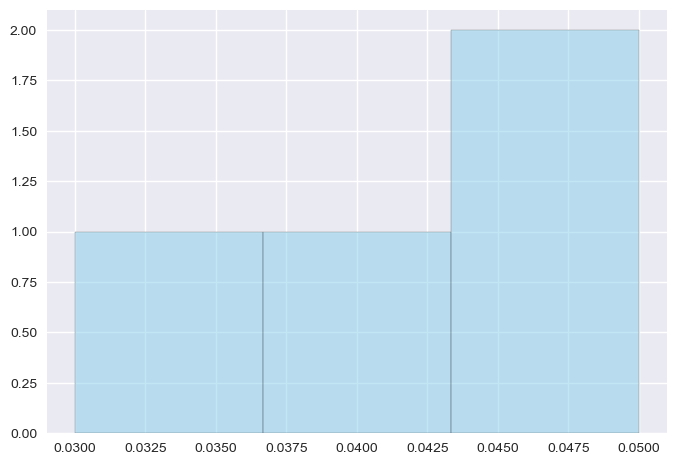

In [43]:
# METHOD 1: Auto Binning with Density=False

counts_m1, bin_edges_m1 = np.histogram(tmax_var, bins='auto', density=False)
bin_centers_m1 = 0.5 * (bin_edges_m1[:-1] + bin_edges_m1[1:])
P_m1 = counts_m1 / counts_m1.sum()   # Normalize density to get PMF
sdi_m1 = (bin_centers_m1**1.5) * P_m1
total_sdi_m1 = sdi_m1.sum()

# Debugging info
print(f"Number of bins: {len(bin_edges_m1)-1}")
print(f"Bin edges {len(bin_edges_m1)}, {bin_edges_m1}")
print(f"Bin centers {len(bin_centers_m1)}, {bin_centers_m1}")
print("\nCounts (density=False):", {len(counts_m1)}, counts_m1)
print("Probability (P):", P_m1)
print(f"Sum of P: {P_m1.sum()}")
print("\nSDI all:", {len(sdi_m1)}, sdi_m1)
print("Max SDI:", sdi_m1.max())

# Plotting the histogram
with plt.style.context('seaborn-v0_8'):
    plt.hist(tmax_var, bins=bin_edges_m1, density=False, alpha=0.5, color='skyblue', edgecolor='black')
    plt.show()

Consistent binning across all cells. Density-based probabilities (density=True)

Sum of heights * bin widths = 1.0
Number of bins: 3
Bin edges:4, [0.03       0.03666667 0.04333333 0.05      ]
Bin centers 3, [0.03333333 0.04       0.04666667]

Counts (density=False): {3} [37.5 37.5 75. ]
Probability (P): [0.25 0.25 0.5 ]
Sum of P: 1.0

SDI all: {3} [0.00152145 0.002      0.00504058]
Max SDI: 0.00504057609876167


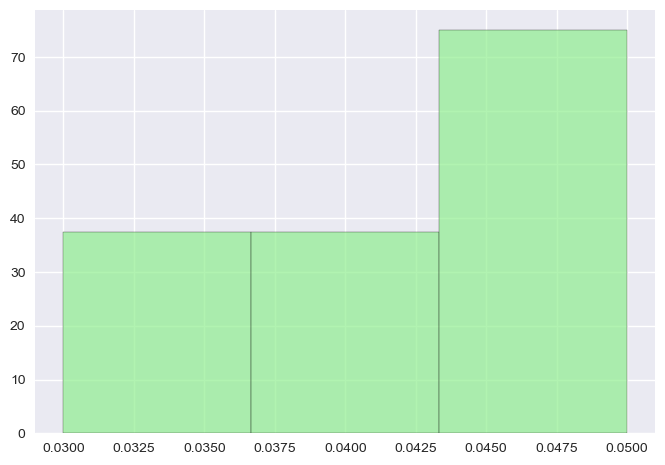

In [44]:
# METHOD 2: Fixed Binning with Density=True

counts_m2, bin_edges_m2 = np.histogram(tmax_var, bins='auto', density=True)
bin_centers_m2 = 0.5 * (bin_edges_m2[:-1] + bin_edges_m2[1:])

# Verify that the area under the histogram is 1
widths = np.diff(bin_edges_m2)
area = (counts_m2 * widths).sum()
print("Sum of heights * bin widths =", area)

# Calculate PMF from density
P_m2 = counts_m2 * widths
sdi_m2 = (bin_centers_m2**1.5) * P_m2
total_sdi_m2 = sdi_m2.sum()

# Debugging info
print(f"Number of bins: {len(bin_edges_m2)-1}")
print(f"Bin edges:{len(bin_edges_m2)}, {bin_edges_m2}")
print(f"Bin centers {len(bin_centers_m2)}, {bin_centers_m2}")
print("\nCounts (density=False):", {len(counts_m2)}, counts_m2)
print("Probability (P):", P_m2)
print(f"Sum of P: {P_m2.sum()}")
print("\nSDI all:", {len(sdi_m2)}, sdi_m2)
print("Max SDI:", sdi_m2.max())

# Plotting the histogram
with plt.style.context('seaborn-v0_8'):
    plt.hist(tmax_var, bins=bin_edges_m2, density=True, alpha=0.7, color='lightgreen', edgecolor='black')
    plt.show()


Uses actual data values without any binning. May be computationally intensive for very large datasets with many unique values. [NumPy Doc](https://numpy.org/doc/stable/reference/generated/numpy.unique.html)


Counts (density=False): {3} [1 1 2]
Probability (P): [0.25 0.25 0.5 ]
Sum of P: 1.0

SDI all: {3} [0.00129904 0.002      0.00559017]
Max SDI: 0.005590169943749475


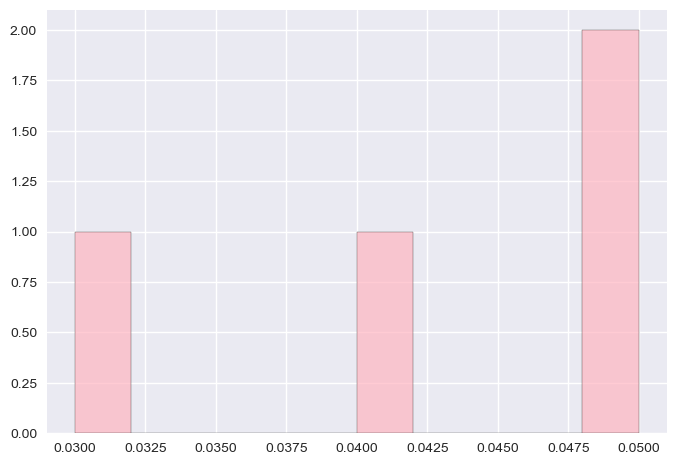

In [45]:
# METHOD 3: Exact Values (No Binning)

# Calculate SDI using exact values instead of histogram
unique_vals_m3, counts_m3 = np.unique(tmax_var, return_counts=True)
P_m3 = counts_m3 / len(tmax_var)
sdi_m3 = (np.array(unique_vals_m3)**1.5) * P_m3
total_sdi_m3 = sdi_m3.sum()

# Debugging info
print("\nCounts (density=False):", {len(counts_m3)}, counts_m3)
print("Probability (P):", P_m3)
print(f"Sum of P: {P_m3.sum()}")
print("\nSDI all:", {len(sdi_m3)}, sdi_m3)
print("Max SDI:", sdi_m3.max())

# Plotting the histogram
with plt.style.context('seaborn-v0_8'):
    plt.hist(tmax_var, density=False, alpha=0.7, color='lightpink', edgecolor='black')
    plt.show()



Counts (density=False): {3} [1 1 2]
Probability (P): [0.25 0.25 0.5 ]
Sum of P: 1.0

SDI all: {3} [0.12990381 0.2        0.55901699]
Max SDI: 0.5590169943749476


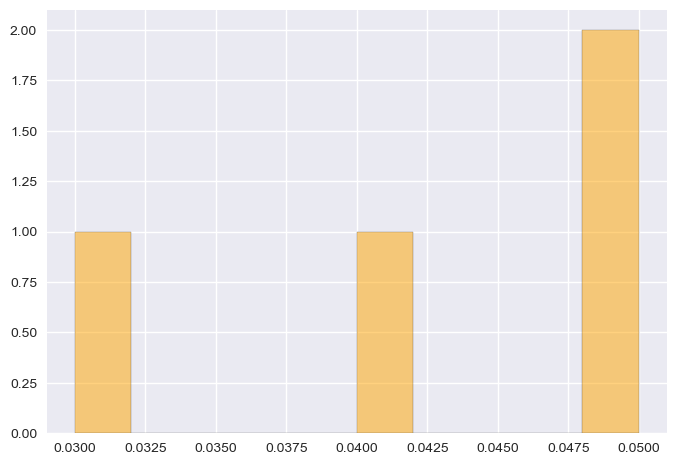

In [46]:
# METHOD 3: Exact Values (No Binning)

# Calculate SDI using exact values instead of histogram
unique_vals_m3, counts_m3 = np.unique(tmax_var, return_counts=True)
P_m3 = counts_m3 / len(tmax_var)
sdi_m3 = (np.array(unique_vals_m3)**1.5) * (P_m3 * 100)
total_sdi_m3 = sdi_m3.sum()

# Debugging info
print("\nCounts (density=False):", {len(counts_m3)}, counts_m3)
print("Probability (P):", P_m3)
print(f"Sum of P: {P_m3.sum()}")
print("\nSDI all:", {len(sdi_m3)}, sdi_m3)
print("Max SDI:", sdi_m3.max())

# Plotting the histogram
with plt.style.context('seaborn-v0_8'):
    plt.hist(tmax_var, density=False, alpha=0.5, color='orange', edgecolor='black')
    plt.show()

In [47]:
# Compare if arrays are exactly equal
np.array_equal(sdi_m1, sdi_m2) 

True

In [48]:
# Compare with tolerance
np.allclose(sdi_m1, sdi_m3, rtol=1e-06, atol=1e-06)

False

In [49]:
# Element-wise comparison
diff_idx = np.where(~((sdi_m1 == sdi_m2) & (sdi_m2 == sdi_m3)))
print("Indices with mismatch:", diff_idx)
print("smi1:", sdi_m1[diff_idx])
print("smi2:", sdi_m2[diff_idx])
print("smi3:", sdi_m3[diff_idx])

Indices with mismatch: (array([0, 1, 2], dtype=int64),)
smi1: [0.00152145 0.002      0.00504058]
smi2: [0.00152145 0.002      0.00504058]
smi3: [0.12990381 0.2        0.55901699]
